In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import Axes3D

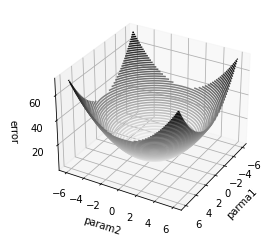

In [5]:
def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('parma1')
ax.set_ylabel('param2')
ax.set_zlabel('error')

ax.view_init(30, 30)

In [14]:
x = torch.tensor(3, dtype=torch.float, requires_grad=True)
y = torch.tensor(3, dtype=torch.float, requires_grad=True)

In [15]:
for i in range(100):
    # Compute the operation. We want to minimise the result. To do so we can compute
    # the gradient of each variable and apply the gradient descent formula.
    result = x**2 + y**2
    print("Result = >>", result)
    
    # Compute the gradient for each operations made before
    result.backward()
    
    # Apply gradient descent without tracking the gradient.
    with torch.no_grad():
        x -= 0.2*x.grad
        y -= 0.2*y.grad
        
    x.grad.zero_()
    y.grad.zero_()

Result = >> tensor(18., grad_fn=<AddBackward0>)
Result = >> tensor(6.4800, grad_fn=<AddBackward0>)
Result = >> tensor(2.3328, grad_fn=<AddBackward0>)
Result = >> tensor(0.8398, grad_fn=<AddBackward0>)
Result = >> tensor(0.3023, grad_fn=<AddBackward0>)
Result = >> tensor(0.1088, grad_fn=<AddBackward0>)
Result = >> tensor(0.0392, grad_fn=<AddBackward0>)
Result = >> tensor(0.0141, grad_fn=<AddBackward0>)
Result = >> tensor(0.0051, grad_fn=<AddBackward0>)
Result = >> tensor(0.0018, grad_fn=<AddBackward0>)
Result = >> tensor(0.0007, grad_fn=<AddBackward0>)
Result = >> tensor(0.0002, grad_fn=<AddBackward0>)
Result = >> tensor(8.5291e-05, grad_fn=<AddBackward0>)
Result = >> tensor(3.0705e-05, grad_fn=<AddBackward0>)
Result = >> tensor(1.1054e-05, grad_fn=<AddBackward0>)
Result = >> tensor(3.9793e-06, grad_fn=<AddBackward0>)
Result = >> tensor(1.4326e-06, grad_fn=<AddBackward0>)
Result = >> tensor(5.1572e-07, grad_fn=<AddBackward0>)
Result = >> tensor(1.8566e-07, grad_fn=<AddBackward0>)
Result

In [7]:
print(x, y)

tensor(3., requires_grad=True) tensor(3., requires_grad=True)


In [16]:
# Simple neural network on MNIST
from torchvision import datasets, transforms
import torch.nn.functional as F

In [18]:
# Transform each image into tensor and normalized with mean and std
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
# Define the batch size used each time we go through the dataset
batch_size = 32

# Set the training loader
train_loader = torch.utils.data.DataLoader(datasets.MNIST('C:/Users/pierr/&Codes', train=True, download=True, transform=transform), batch_size=batch_size, shuffle=True)
# Set the testing loader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('C:/Users/pierr/&Codes', train=False, download=True, transform=transform), batch_size=batch_size, shuffle=True)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting C:/Users/pierr/&Codes\MNIST\raw\train-images-idx3-ubyte.gz to C:/Users/pierr/&Codes\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting C:/Users/pierr/&Codes\MNIST\raw\train-labels-idx1-ubyte.gz to C:/Users/pierr/&Codes\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting C:/Users/pierr/&Codes\MNIST\raw\t10k-images-idx3-ubyte.gz to C:/Users/pierr/&Codes\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting C:/Users/pierr/&Codes\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:/Users/pierr/&Codes\MNIST\raw



In [19]:
## Init weights
# 784 because there is 784 pixels in each image
# 10 because there is 10 possible outputs : 0,1,2,3,4,5,6,7,8,9
# Each pixel is linked to 10 outputs where each link is a weight to optimize\
# <=> Each class is linked to 784 pixel where each link is a weight to optimize
weights = torch.randn(784, 10, requires_grad=True)

In [46]:
def test(weights, test_loader):
    test_size = len(test_loader.dataset)
    correct = 0

    for batch_idx, (data, target) in enumerate(test_loader):
        #print(batch_idx, data.shape, target.shape)
        data = data.view((-1, 28*28))
        #print(batch_idx, data.shape, target.shape)

        outputs = torch.matmul(data, weights)
        softmax = F.softmax(outputs, dim=1)
        pred = softmax.argmax(dim=1, keepdim=True)
        n_correct = pred.eq(target.view_as(pred)).sum().item()
        correct += n_correct

    acc = correct / test_size
    print(" Accuracy on test set", acc)
    return

test(weights, test_loader)

 Accuracy on test set 0.867


In [58]:
it = 0
for batch_idx, (data, targets) in enumerate(train_loader):
    # Be sure to start the loop with zeros grad
    if weights.grad is not None:
        weights.grad.zero_()
    
    data = data.view((-1, 28*28))
    #print("batch_idx: {}, data.shape: {}, target.shape: {}".format(batch_idx, data.shape, targets.shape))
    outputs = torch.matmul(data, weights)
    #print("outputs.shape: {}".format(outputs.shape))

    log_softmax = F.log_softmax(outputs, dim=1)
    #print("Log softmax: {}".format(log_softmax.shape))

    #print((-log_softmax[0][targets[0]] + -log_softmax[1][targets[1]] )  / 2 )
    #print(-log_softmax[0][targets[0]], targets[0])
    
    loss = F.nll_loss(log_softmax, targets)
    print("\rLoss shape: {}".format(loss), end="")
    
    # Compute the gradients for each variables
    loss.backward()
    
    with torch.no_grad():
        weights -= 0.1*weights.grad
        
    it += 1
    if it % 100 == 0:
        test(weights, test_loader)
        
    if it > 5000:
        break

Loss shape: 1.952464103698730562 Accuracy on test set 0.8844
Loss shape: 0.229853287339210554 Accuracy on test set 0.8827
Loss shape: 0.640362322330474996 Accuracy on test set 0.8831
Loss shape: 1.3444594144821167865 Accuracy on test set 0.8864
Loss shape: 1.85258364677429248 Accuracy on test set 0.8767
Loss shape: 0.649151623249054776 Accuracy on test set 0.8854
Loss shape: 0.035918701440095935 Accuracy on test set 0.8879
Loss shape: 0.76390689611434948 Accuracy on test set 0.8818
Loss shape: 0.448266565799713136 Accuracy on test set 0.8911
Loss shape: 1.129987478256225669 Accuracy on test set 0.881
Loss shape: 1.480090618133545726 Accuracy on test set 0.8876
Loss shape: 1.669326066970825273 Accuracy on test set 0.8888
Loss shape: 1.308423995971679738 Accuracy on test set 0.8867
Loss shape: 0.482811182737350462 Accuracy on test set 0.8891
Loss shape: 1.7568475008010864716 Accuracy on test set 0.8868
Loss shape: 0.142172366380691538 Accuracy on test set 0.8874
Loss shape: 0.43615669012

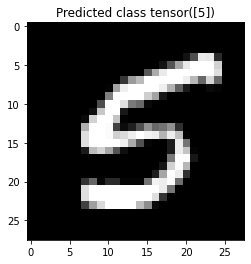

In [74]:
import matplotlib.pyplot as plt

batch_idx, (data, target) = next(enumerate(test_loader))
data = data.view((-1, 28*28))

outputs = torch.matmul(data, weights)
softmax = F.softmax(outputs, dim=1)
pred = softmax.argmax(dim=1, keepdim=True)

plt.imshow(data[0].view(28, 28), cmap="gray")
plt.title("Predicted class {}".format(pred[0]))
plt.show()